In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
import matplotlib.mlab as mlab

In [86]:
def getCO(linename, filelist, obj=None):
    from astropy.io import ascii
    from astropy.table import vstack
    
    # vstack the fitting results from separated files
    for foo in filelist:
        if filelist.index(foo) == 0:
            data = ascii.read(foo)
        else:
            data = vstack([data, ascii.read(foo)])
    
    if obj != None:
        selector = (data['Object'] == obj) & (data['Line'] == linename) & (data['Validity'] == 1)
    else:
        selector = (data['Line'] == linename) & (data['Validity'] == 1)
    
    if 'Str(W/cm2)' in data.colnames:
        flux_key = 'Str(W/cm2)'
    else:
        flux_key = 'Str(W/cm2/as2)'
    
    flux = data[flux_key][selector]
    ra = data['RA(deg)'][selector]
    dec = data['Dec(deg)'][selector]
    
    return flux, ra, dec

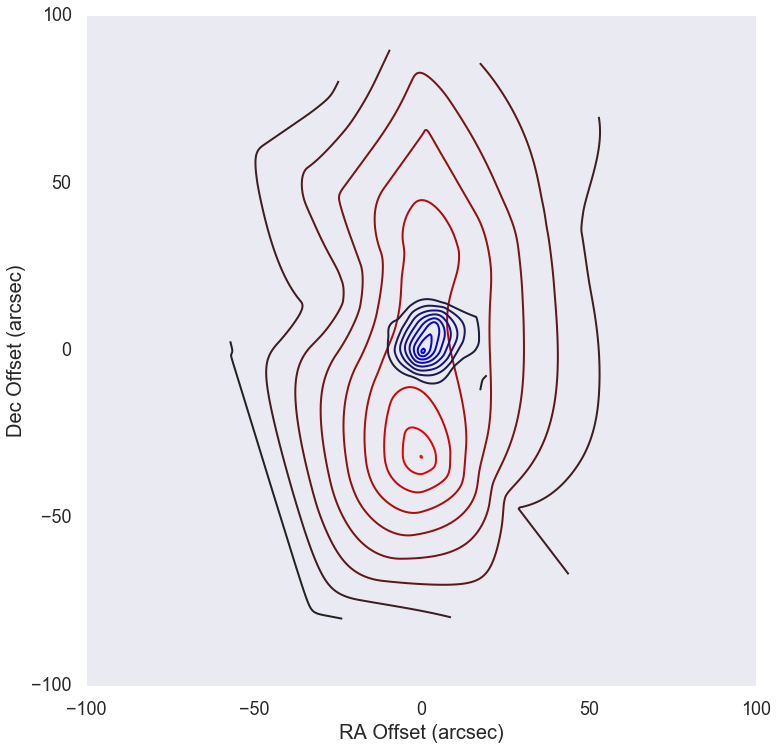

In [87]:
# Create figure to be plotted later
fig = plt.figure(figsize=(12,12))
sns.set(style="dark")

# For line in SPIRE
linename = 'CO13-12'
obj = 'BHR71'
# construct filelist
rootpath = '/Volumes/SD-Mac/CDF_archive_v2/'
spire_pix = ['SLWA1','SLWA2','SLWA3','SLWB1','SLWB2',
             'SLWB3','SLWB4','SLWC1','SLWC2','SLWC3',
             'SLWC4','SLWC5','SLWD1','SLWD2','SLWD3',
             'SLWD4','SLWE1','SLWE2','SLWE3',
             'SSWA1','SSWA2','SSWA3','SSWA4','SSWB1',
             'SSWB2','SSWB3','SSWB4','SSWB5','SSWC1',
             'SSWC2','SSWC3','SSWC4','SSWC5','SSWC6',
             'SSWD1','SSWD2','SSWD3','SSWD4','SSWD6',
             'SSWD7','SSWE1','SSWE2','SSWE3','SSWE4',
             'SSWE5','SSWE6','SSWF1','SSWF2','SSWF3',
             'SSWF5','SSWG1','SSWG2','SSWG3','SSWG4']
for i in range(len(spire_pix)):
    spire_pix[i] = rootpath+obj+'/spire/advanced_products/cube/'+obj+'_'+spire_pix[i]+'_lines.txt'

flux, ra, dec = getCO(linename, spire_pix)

# coordinates switch from absolute to relative
ra_cen = ascii.read(rootpath+obj+'/spire/advanced_products/cube/'+obj+'_SLWC3_lines.txt')['RA(deg)'].data[0]
dec_cen = ascii.read(rootpath+obj+'/spire/advanced_products/cube/'+obj+'_SLWC3_lines.txt')['Dec(deg)'].data[0]
ra = (ra-ra_cen)*3600*np.cos(np.radians(dec))
dec = (dec-dec_cen)*3600

# re-grid
xi = np.linspace(-100, 100, 500)
yi = np.linspace(-100, 100, 500)
fluxi = mlab.griddata(ra, dec, flux, xi, yi, interp='nn')

# plot
ax = fig.add_subplot(111)
cmap = sns.dark_palette("red", as_cmap=True)
ax.contour(xi, yi, fluxi, 10, linewidths=2, cmap=cmap)
ax.set_aspect('equal', 'datalim')


# For line in PACS
linename = 'CO22-21'
obj = 'BHR71'
# construct filelist
rootpath = '/Volumes/SD-Mac/CDF_archive_v2/'
pacs_pix = range(1,26)
for i in range(len(pacs_pix)):
    pacs_pix[i] = rootpath+obj+'/pacs/advanced_products/cube/'+obj+'_pacs_pixel'+str(pacs_pix[i])+'_hsa_lines.txt'

flux, ra, dec = getCO(linename, pacs_pix)

# coordinates switch from absolute to relative
ra_cen = ascii.read(rootpath+obj+'/pacs/advanced_products/cube/'+obj+'_pacs_pixel13_hsa_lines.txt')['RA(deg)'].data[0]
dec_cen = ascii.read(rootpath+obj+'/pacs/advanced_products/cube/'+obj+'_pacs_pixel13_hsa_lines.txt')['Dec(deg)'].data[0]
ra = (ra-ra_cen)*3600*np.cos(np.radians(dec))
dec = (dec-dec_cen)*3600

# re-grid
xi = np.linspace(-100, 100, 500)
yi = np.linspace(-100, 100, 500)
fluxi = mlab.griddata(ra, dec, flux, xi, yi, interp='nn')

# plot
cmap = sns.dark_palette("blue", as_cmap=True)
ax.contour(xi, yi, fluxi, 10, linewidths=2, cmap=cmap)

ax.set_xlabel('RA Offset (arcsec)', fontsize=20)
ax.set_ylabel('Dec Offset (arcsec)', fontsize=20)
ax.tick_params('both',labelsize=18,width=2,which='major',pad=15)

fig.savefig('/Users/yaolun/bhr71/for_Bourke/CO_contours.pdf', format='pdf', dpi=300, bbox_inches='tight')